In [1]:
from datetime import datetime, timedelta
import DataUtility as du


def resample_ohlc(org_df, timeframe):
    org_df.index = org_df.index - timedelta(hours=9)
    df = org_df.resample(timeframe).agg(
        {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'})
    df = df.dropna(how='any')
    org_df.index = org_df.index + timedelta(hours=9)
    df.index = df.index + timedelta(hours=9)
    return df


def chart_ohlc(org_df, symbol):
    chart = du.Chart(org_df)
    chart.reset()
    chart.set_title(title=symbol, loc='center', fontsize=16)
    chart.set_size(width=16, height=12)
    chart.set_candlestick(ax=0, open='open', high='high', low='low', close='close')
    chart.set_x(col=None, grid=True, converter=du.Chart.to_date_format, format='%m/%d')
    chart.set_y(ax=0, title='price', grid=True, legend=False, gridspec=2)
    chart.plot()

In [2]:
import pandas as pd

symbol = 'ETH_JPY'
csv_dt = 20210831
bf=pd.read_csv(f'csv/bf_trades_{symbol}.csv')
bf.rename(columns={'exec_date': 'time'}, inplace=True)
bf=bf.set_index('time')
bf.index = pd.to_datetime(bf.index, utc=True).tz_localize(None)

interval = '1S'
bf_ohlc = pd.concat([bf["price"].resample(interval).ohlc().ffill(),
                     bf["size"].resample(interval).sum(),], axis=1)
bf_ohlc.columns = ["open", "high", "low", "close", "volume"]

In [3]:
symbol = 'ETH_JPY'
gmo_df = pd.read_csv(f'gmo/{symbol}/ohlcv/1S/20210901.csv')
gmo_df.rename(columns={'unixtime': 'time'}, inplace=True)
gmo_df=gmo_df.set_index('time')
gmo_df.index = pd.to_datetime(gmo_df.index, unit='s', utc=True).tz_localize(None)

In [4]:
gmo_df = gmo_df['2021-09-01 05:00:00': '2021-09-01 19:59:59']
bf_df = bf_ohlc['2021-09-01 05:00:00': '2021-09-01 19:59:59']

In [5]:
gmo_open = gmo_df['open'].to_numpy()
bf_open = bf_df['open'].to_numpy()

In [6]:
from calc_self_correlation import plot_corrcoef, np_shift

In [7]:
second = 6
past_returns = []
future_returns = []
for index in range(second, len(bf_open) - second):
    past_returns.append(gmo_open[index] - gmo_open[index - second])
    future_returns.append(bf_open[index + second] - bf_open[index])

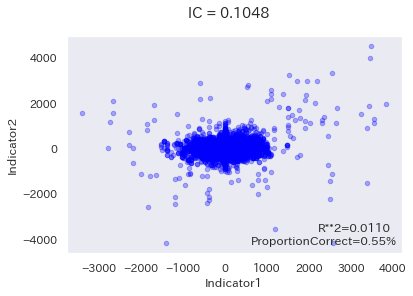

In [8]:
plot_corrcoef(past_returns, future_returns)